<a href="https://colab.research.google.com/github/aggelospsiris/Text-classification-using-neural-networks/blob/main/embeddings_lstm3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()
import re
import numpy as np

#labels into vectors array
Y_train_labels = np.loadtxt("/content/sample_data/train-label.dat")
#prepare train
newlines = []
with open('/content/sample_data/train-data.dat', 'r') as f:
    lines = f.readlines()
    for line in lines:
        # in every line erase any occurance that starts with < and ends with > with
        newline = re.sub("\<[^>]*\>", "", line)
        arr = newline.split()
        arr = list(map(int, arr))
        newlines.append(arr)



In [7]:
#i am using this block to find the length of the padded vectors
lengths = []
for line in newlines:
  lengths.append(len(line))

arr = np.array(lengths)
max_lenght = np.amax(arr)
max_lenght

270

In [8]:
newlines[0]


[6705, 5997, 8310, 3606, 674, 8058, 5044, 4836, 4312, 5154, 8310, 4225]

In [9]:
len(newlines)


8251

In [10]:
Y_train_labels[0]

array([1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.])

In [11]:
len(Y_train_labels)

8251

In [12]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(newlines,maxlen=max_lenght,padding='post',truncating='post',value=8520)

In [13]:
train_padded[50]

array([ 859,  444, 1037,  859,  444, 8482, 4466, 8482, 2609,  740, 7553,
        852, 3664,  529, 7102, 5094, 4948, 1382, 7102, 5094, 5094,  852,
       3664, 7739, 1910, 1938, 5217,  682, 5217, 2610, 7144,  550, 5970,
       1977, 1630, 2863, 1985, 1499,  327, 7962,  740, 6190, 6171, 1113,
       3610, 2287, 7483, 2155, 4187, 6213, 6190, 1113, 3610, 2287, 7483,
          6, 7553, 7464, 2287,  894, 1316, 5534, 6190, 1251, 6685,  381,
        965, 6166, 4912, 2759, 4588, 1781, 3324, 2054,  539, 5752,  539,
       4312, 6131,  803, 7962, 7483, 3967, 4621, 3145, 4407, 4015, 4621,
       3593, 2015, 7553,   47, 5582, 1781, 3558, 6544, 2015, 7553,   47,
       6190, 3869, 2818, 7553,  971, 6190, 3869, 4112, 3982, 3290, 7553,
       4439, 2818, 7553, 1378,    6, 7553, 3424, 1574,  539, 6213, 6190,
       7439, 5924,  188,    6, 7553, 2804, 2044, 4439, 2985, 6803, 7553,
       2895, 3355, 3654, 4258, 3982, 3290, 7679, 7034, 6119, 4439,    6,
       4439, 2818, 4439, 4911, 5427, 4749, 2818, 75

In [14]:
len(train_padded)

8251

In [15]:
from keras.layers import Dense,Embedding,Flatten,LSTM
from keras.models import Sequential
from sklearn.model_selection import KFold
import keras
from tensorflow import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping



In [16]:
def ce_model():
    # Create model
    model = Sequential()
    #Embedding layer
    model.add(Embedding(8521,100,input_length=max_lenght,mask_zero=True))
    model.add(LSTM(64))
    #output layer with 20 output neuron cause the classfication classes are 20
    model.add(Dense(20, activation='sigmoid'))
    opt = keras.optimizers.SGD(learning_rate=0.001, nesterov=False, name="SGD")
    model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
    return model
def mse_model():
    # Create model
    model = Sequential()
    #Embedding layer
    model.add(Embedding(8521,100,input_length=max_lenght,mask_zero=True))
    model.add(LSTM(64))
    #output layer with 20 output neuron cause the classfication classes are 20
    model.add(Dense(units = 20, activation='sigmoid'))
    opt = keras.optimizers.SGD(learning_rate=0.001, nesterov=False, name="SGD")
    model.compile(optimizer=opt,loss=keras.losses.mse, metrics=['accuracy'])
    return model

In [17]:
#c.cross-validation
# Split the data to training and testing data 5-Fold
kfold = KFold(n_splits=5, shuffle=True)
ce_loss = []
mse_loss = []
acc_mse=[]
acc_ce=[]

In [18]:
from inspect import trace
for i, (train, test) in enumerate(kfold.split(train_padded)):

    callback = EarlyStopping(monitor="val_accuracy", mode="max", min_delta=0, patience=5, verbose=0)

    # Fit models
    #CE
    model1=ce_model()
    history_ce = model1.fit(train_padded[train], Y_train_labels[train],
                            validation_data=(train_padded[train], Y_train_labels[train]),
                            callbacks=[callback],
                            epochs=100, batch_size=200, verbose=0)
    loss_ce, accuracy_ce = model1.evaluate(train_padded[test], Y_train_labels[test],verbose=0)
    #MSE
    model2=mse_model()
    history_mse = model2.fit(train_padded[train], Y_train_labels[train],
                             validation_data=(train_padded[train], Y_train_labels[train]),
                             callbacks=[callback],
                             epochs=100, batch_size=200, verbose=0)
    loss_mse, accuracy_mse = model2.evaluate(train_padded[test], Y_train_labels[test],verbose=0)
    
    mse_loss.append(loss_mse)
    acc_ce.append(accuracy_ce)
    acc_mse.append(accuracy_mse)
    ce_loss.append(loss_ce)

    print("Fold :", i)
    print("CE :", loss_ce)
    print("MSE :", loss_mse)
    print("Acc_CE :", accuracy_ce)
    print("Acc_MSE :", accuracy_mse)
    print("---------------------------------------")

Fold : 0
CE : 0.6851839423179626
MSE : 0.249208465218544
Acc_CE : 0.0496668703854084
Acc_MSE : 0.0496668703854084
---------------------------------------
Fold : 1
CE : 0.6834015250205994
MSE : 0.24898269772529602
Acc_CE : 0.019999999552965164
Acc_MSE : 0.010303030721843243
---------------------------------------
Fold : 2
CE : 0.6859245300292969
MSE : 0.24845516681671143
Acc_CE : 0.2630302906036377
Acc_MSE : 0.04848484694957733
---------------------------------------
Fold : 3
CE : 0.6798138618469238
MSE : 0.24871475994586945
Acc_CE : 0.2587878704071045
Acc_MSE : 0.03030303120613098
---------------------------------------
Fold : 4
CE : 0.6837760210037231
MSE : 0.24907100200653076
Acc_CE : 0.0321212112903595
Acc_MSE : 0.01515151560306549
---------------------------------------


In [21]:
#print the mean results
print("Accuracy_MSE: ", np.mean(acc_mse))
print("Accuracy_CE: ", np.mean(acc_ce))
print("CE is : ", np.mean(ce_loss))
print("MSE is : ", np.mean(mse_loss))

Accuracy_MSE:  0.030781858973205088
Accuracy_CE:  0.12472124844789505
CE is :  0.6836199760437012
MSE is :  0.24888641834259034


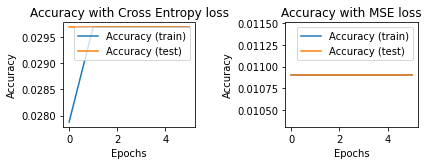

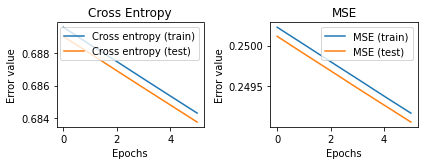

In [22]:
#Plots
pyplot.figure(0)
pyplot.subplot(2, 2, 1)
pyplot.plot(history_ce.history['accuracy'], label='Accuracy (train)')
pyplot.plot(history_ce.history['val_accuracy'], label='Accuracy (test)')
pyplot.title("Accuracy with Cross Entropy loss")
pyplot.ylabel("Accuracy")
pyplot.xlabel("Epochs")
pyplot.legend()

pyplot.subplot(2, 2, 2)
pyplot.plot(history_mse.history['accuracy'], label='Accuracy (train)')
pyplot.plot(history_mse.history['val_accuracy'], label='Accuracy (test)')
pyplot.title("Accuracy with MSE loss")
pyplot.ylabel("Accuracy")
pyplot.xlabel("Epochs")
pyplot.legend()
pyplot.tight_layout()
pyplot.show()


# plot the cross entropy loss
pyplot.figure(1)
pyplot.subplot(2, 2, 1)
pyplot.plot(history_ce.history['loss'], label='Cross entropy (train)')
pyplot.plot(history_ce.history['val_loss'], label='Cross entropy (test)')
pyplot.title('Cross Entropy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Error value')
pyplot.legend()

# plot the mse loss
pyplot.subplot(2, 2, 2)
pyplot.plot(history_mse.history['loss'], label='MSE (train)')
pyplot.plot(history_mse.history['val_loss'], label='MSE (test)')
pyplot.title('MSE')
pyplot.xlabel('Epochs')
pyplot.ylabel('Error value')
pyplot.legend()
pyplot.tight_layout()
pyplot.show()